In [1]:
#모듈IMPORT
import pandas as pd

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset

,CLLT_FP_PRNO,INCB_DVSN,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,FP_CAREER,OCCP_GRP,TOTALPREM,...,MAX_PAYM_YEAR,MAX_PAYM_MONTH,MNTH_INCM_AMT_AVG,MAIN_INSR_AMT_SUM,SUM_ORIG_PREM_SUM,EXPR_SUM,CNTT_TERM_AVG,WORK_YEARS_MAX,WORK_YEARS_MIN,EXPR_COUNT
0,26646,R,1,1,N,2,4,N,1,14,...,2008,11,5.250000e+05,120266433,30231650,0,1.750000,17,0,8
1,29148,R,2,1,N,1,5,N,1,9,...,2000,12,5.833333e+05,210000000,2737739,2,5.333333,24,0,6
2,9613,R,6,1,N,1,6,N,11,2,...,2016,6,0.000000e+00,5000000,82850,0,0.000000,1,1,1
3,7867,P,8,1,N,1,5,Y,2,15,...,2006,10,4.100000e+06,1797991770,16400970,22,0.458333,13,1,24
4,22326,P,9,1,N,1,5,N,10,0,...,2002,7,3.250000e+06,110569460,403210,3,1.000000,25,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8473,18166,R,22340,1,N,2,4,N,3,0,...,2012,2,3.000000e+06,120000000,338346,3,1.000000,0,0,3
8474,31474,P,22343,1,N,2,5,N,2,22,...,2014,11,6.066667e+06,981195605,194370744,14,4.133333,11,6,15
8475,18777,P,22356,1,N,2,5,N,8,0,...,2015,8,1.500000e+06,50000000,63169,0,0.000000,5,5,1
8476,18617,R,22368,1,N,2,4,N,3,0,...,2016,2,3.000000e+06,65000000,83136,0,1.000000,2,2,2


In [4]:
# pycaret 라이브러리 설치
!pip install pycaret

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached wordcloud-1.8.1-cp38-cp38-win_amd64.whl (155 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68724 sha256=af49cf05

      Successfully uninstalled scikit-learn-0.24.1
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.0
    Uninstalling imbalanced-learn-0.8.0:
      Successfully uninstalled imbalanced-learn-0.8.0
  Attempting uninstall: gensim
    Found existing installation: gensim 4.0.1
    Uninstalling gensim-4.0.1:
      Successfully uninstalled gensim-4.0.1


In [3]:
# PyCaret의 set up list
#Classification -> from pycaret.classification import *
#Regression -> from pycaret.regression import *
#Clustering -> from pycaret.clustering import *
#Anomaly Detection -> from pycaret.anomaly import *
#Natural Language Processing -> from pycaret.nlp import *
#Association Rule Mining -> from pycaret.arules import *

# 보험사기여부 예측을 위해 Classification 모듈 import
from pycaret.classification import *
test = setup(dataset, target = 'SIU_CUST_YN',
            ignore_features=['CUST_ID'])

,Description,Value
0,session_id,1336
1,Target,SIU_CUST_YN
2,Target Type,Binary
3,Label Encoded,"N: 0, Y: 1"
4,Original Data,"(8478, 24)"
5,Missing Values,True
6,Numeric Features,14
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [4]:
# 모델의 성능 비교
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9035,0.5780,0.0000,0.0000,0.0000,0.0000,0.0000,0.4010
ridge,Ridge Classifier,0.9033,0.0000,0.0019,0.1000,0.0037,0.0026,0.0103,0.0140
et,Extra Trees Classifier,0.9033,0.5605,0.0038,0.1500,0.0073,0.0056,0.0185,0.3590
ada,Ada Boost Classifier,0.9029,0.6210,0.0038,0.1500,0.0073,0.0049,0.0157,0.1800
lightgbm,Light Gradient Boosting Machine,0.9025,0.5890,0.0189,0.3817,0.0359,0.0275,0.0668,0.3300
gbc,Gradient Boosting Classifier,0.9022,0.6171,0.0057,0.2000,0.0110,0.0065,0.0219,0.6310
lda,Linear Discriminant Analysis,0.9016,0.6210,0.0075,0.1250,0.0142,0.0080,0.0167,0.0380
svm,SVM - Linear Kernel,0.8983,0.0000,0.0038,0.0067,0.0048,-0.0031,-0.0045,0.0210
knn,K Neighbors Classifier,0.8976,0.4885,0.0019,0.0333,0.0036,-0.0080,-0.0163,0.0690
xgboost,Extreme Gradient Boosting,0.8972,0.5681,0.0228,0.2050,0.0407,0.0222,0.0381,0.9000


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1336, verbose=0,
                       warm_start=False)

In [5]:
# 가장 우수한 성능의 모델 생성
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.5747,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.9048,0.5723,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9029,0.5999,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9029,0.5712,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.9029,0.5493,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.9029,0.5853,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.9029,0.5261,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.9029,0.6596,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.9029,0.5691,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.9046,0.5727,0.0000,0.0000,0.0000,0.0000,0.0000


In [6]:
# 생성된 모델 튜닝(하이퍼 파라미터로 자동 튜닝)
tuned_rf = tune_model('rf') # 버전 떄문인지 튜닝이 안됨

TypeError: The behavior of tune_model in version 1.0.1 is changed. Please pass trained model object.

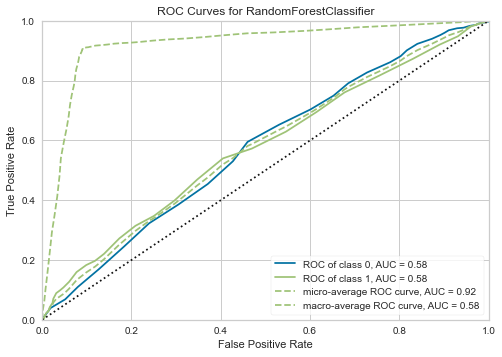

In [7]:
# AUC 곡선
plot_model(estimator = rf, plot = 'auc')

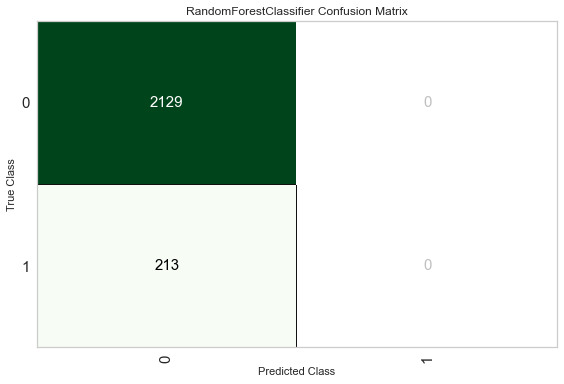

In [8]:
# 오차 행렬
plot_model(estimator = rf, plot = 'confusion_matrix')

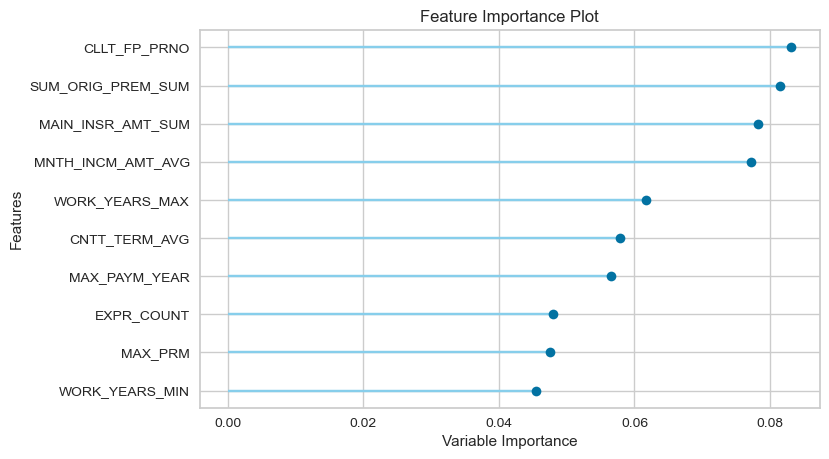

In [12]:
# 중요 변수 그래프 : 보험 사기에 가장 많은 영향을 미치는 변수
plot_model(estimator = rf, plot = 'feature')

In [10]:
# 모델 평가
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [11]:
# 예측
rf_test = finalize_model(rf)
predict_model(rf_test,dataset)

,CLLT_FP_PRNO,INCB_DVSN,CUST_ID,DIVIDED_SET,SIU_CUST_YN,SEX,AGE,FP_CAREER,OCCP_GRP,TOTALPREM,...,MNTH_INCM_AMT_AVG,MAIN_INSR_AMT_SUM,SUM_ORIG_PREM_SUM,EXPR_SUM,CNTT_TERM_AVG,WORK_YEARS_MAX,WORK_YEARS_MIN,EXPR_COUNT,Label,Score
0,26646,R,1,1,N,2,4,N,1,14,...,5.250000e+05,120266433,30231650,0,1.750000,17,0,8,N,0.91
1,29148,R,2,1,N,1,5,N,1,9,...,5.833333e+05,210000000,2737739,2,5.333333,24,0,6,N,0.92
2,9613,R,6,1,N,1,6,N,11,2,...,0.000000e+00,5000000,82850,0,0.000000,1,1,1,N,0.95
3,7867,P,8,1,N,1,5,Y,2,15,...,4.100000e+06,1797991770,16400970,22,0.458333,13,1,24,N,0.94
4,22326,P,9,1,N,1,5,N,10,0,...,3.250000e+06,110569460,403210,3,1.000000,25,25,4,N,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8473,18166,R,22340,1,N,2,4,N,3,0,...,3.000000e+06,120000000,338346,3,1.000000,0,0,3,N,0.95
8474,31474,P,22343,1,N,2,5,N,2,22,...,6.066667e+06,981195605,194370744,14,4.133333,11,6,15,N,0.97
8475,18777,P,22356,1,N,2,5,N,8,0,...,1.500000e+06,50000000,63169,0,0.000000,5,5,1,N,0.96
8476,18617,R,22368,1,N,2,4,N,3,0,...,3.000000e+06,65000000,83136,0,1.000000,2,2,2,N,0.97
